In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\91720\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [3]:
# Load dataset
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv("abalone/abalone.data", names=columns)
data.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Convert Rings to Age
data['Age'] = data['Rings'] + 1.5

In [6]:
# Feature selection (excluding 'Sex' and 'Rings')
X = data[['Length', 'Diameter', 'Height',
        'WholeWeight', 'ShuckedWeight',
        'VisceraWeight', 'ShellWeight']]

y = data['Age']


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [11]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tolerance = 1.5
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100

In [12]:
# Output results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(f"Custom Accuracy (±1.5 years): {accuracy:.2f}%")

Coefficients: [-0.18119341  1.33011613  0.48456433  4.49951923 -4.58906115 -0.96870101
  1.20913506]
Intercept: 11.444627357078721
Mean Squared Error: 5.055541144299381
R-squared: 0.5329844757724523
Custom Accuracy (±1.5 years): 59.45%


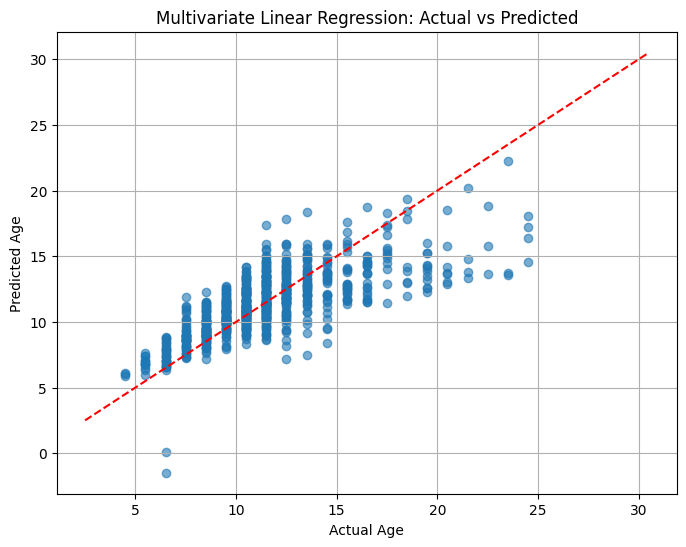

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Multivariate Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()
